# Unit 5 - Financial Planning


In [100]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [101]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [102]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [103]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [104]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
json_btcdata = btc_data.json()
btc_price = json_btcdata["data"]["1"]["quotes"]["USD"]["price"]
#print(btc_price)


# Fetch current ETH price
eth_data = requests.get(eth_url)
json_ethdata = eth_data.json()
eth_price = json_ethdata["data"]["1027"]["quotes"]["USD"]["price"]
#print(eth_price)


# Compute current value of my crpto

my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40596.00
The current value of your 5.3 ETH is $5785.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [105]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [106]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [107]:
# Format current date as ISO format

today = pd.Timestamp("2021-01-04", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
investments_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
investments_df.index = investments_df.index.date
# Preview DataFrame
print(investments_df)

               AGG                                       SPY                  \
              open    high      low   close   volume    open    high     low   
2021-01-04  118.08  118.14  117.985  118.04  6211938  375.31  375.45  364.82   

                              
             close    volume  
2021-01-04  368.85  92938087  


In [108]:
# Pick AGG and SPY close prices


agg_close_price = float(investments_df["AGG"]["close"])
spy_close_price = float(investments_df["SPY"]["close"])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.04
Current SPY closing price: $368.85


In [109]:
# Compute the current value of shares

my_agg_value = agg_close_price*my_agg
my_spy_value = spy_close_price*my_spy



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18442.50
The current value of your 200 AGG shares is $23608.00


### Savings Health Analysis

In [110]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(columns=['Amount'])

crypto = my_btc_value+my_eth_value
shares = my_agg_value+my_spy_value

# Display savings DataFrame
display(df_savings)

,Amount


In [111]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Savings")

TypeError: no numeric data to plot

In [112]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats for having more than the ideal emergency fund amount!")
elif total_savings == emergency_fund:
    print("Congrats for having the ideal emergency fund amount!")
elif total_savings < emergency_fund:
    needed_amount = emergency_fund-total_savings
    print(f"You need {needed_amount} to reach the ideal emergency fund amount!")
    


Congrats for having more than the ideal emergency fund amount!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [132]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-08-06', tz='America/New_York').isoformat()

In [133]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2016-01-06 00:00:00-05:00  108.34  108.460  108.22  108.43  2674241.0  198.34   
2016-01-07 00:00:00-05:00  108.40  108.470  108.21  108.43  2267940.0  195.33   
2016-01-08 00:00:00-05:00  108.57  108.710  108.35  108.67  3775874.0  195.19   
2016-01-11 00:00:00-05:00  108.39  108.586  108.34  108.35  2656855.0  193.01   
2016-01-12 00:00:00-05:00  108.44  108.815  108.36  108.59  2988781.0  193.82   

                                                              
                             high     low   close     volume  
time                                                          
2016-01-06 00:00:00-05:00  200.06  197.60  198.79  118917648  
2016-01-07 00:00:00-05:00  198.82  193.59  194.01  174230042  
2016-01-08 00:00:00-05:00  195.85  191.58  191.89  157703921  
2016-01-11 00:00:00-05:00  193.41  189.82  192.08  150051532  
2016-01-12 00:00:00-05:00  194.55  191.14  193.62  139523772

In [134]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [135]:
# Printing the simulation input data
monte_thirtyyear.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
time                                                                    
2016-01-06 00:00:00-05:00  108.34  108.460  108.22  108.43  2674241.0   
2016-01-07 00:00:00-05:00  108.40  108.470  108.21  108.43  2267940.0   
2016-01-08 00:00:00-05:00  108.57  108.710  108.35  108.67  3775874.0   
2016-01-11 00:00:00-05:00  108.39  108.586  108.34  108.35  2656855.0   
2016-01-12 00:00:00-05:00  108.44  108.815  108.36  108.59  2988781.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-06 00:00:00-05:00          NaN  198.34  200.06  197.60  198.79   
2016-01-07 00:00:00-05:00     0.000000  195.33  198.82  193.59  194.01   
2016-01-08 00:00:00-05:00     0.002213  195.19  195.85  191.58  191.89   
2016-01-11 00:00:00-05:00    -0.002945  193.01  193.41  189.82  192.08   
2016-01-12 00:00:00-05:00     0.002215  193.82  194.55  191.14  193.62   

                                                   
                              volume daily_return  
time                                               
2016-01-06 00:00:00-05:00  118917648          NaN  
2016-01-07 00:00:00-05:00  174230042    -0.024045  
2016-01-08 00:00:00-05:00  157703921    -0.010927  
2016-01-11 00:00:00-05:00  150051532     0.000990  
2016-01-12 00:00:00-05:00  139523772     0.008017

In [136]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991134,0.999753,0.985512,1.005559,1.003372,0.995500,1.005481,0.998337,0.995586,0.998315,...,0.989236,1.002169,0.998768,1.004584,1.003623,1.008297,1.013360,1.001227,0.998246,0.994681
2,0.986564,0.992646,0.996631,1.019813,1.004251,0.990675,1.009644,1.004694,1.006417,0.997863,...,0.989677,1.014198,0.987080,0.995699,0.994720,1.007994,0.994868,1.015461,0.995388,0.994153
3,0.975642,0.998991,0.997962,1.024302,0.999154,1.000963,1.018269,1.011480,1.001737,0.989578,...,0.983224,1.010515,0.992130,0.974760,0.995873,1.024179,0.987040,1.020141,0.989251,1.009456
4,0.976246,0.998442,0.994794,1.015158,1.007108,1.005066,1.003530,1.020958,1.009391,0.987329,...,0.979030,1.011080,1.005767,0.980552,1.007408,1.021079,0.995923,1.020344,0.995799,1.013121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.195431,11.430589,15.568760,13.455742,22.932239,24.348253,12.548506,4.505192,6.347098,5.298295,...,15.166413,10.926893,8.577194,7.099722,11.156793,4.121979,40.624737,47.346630,12.125881,10.440799
7557,7.124155,11.462566,15.591821,13.395337,22.749706,24.373760,12.530274,4.554360,6.265997,5.312380,...,14.983363,10.866007,8.542366,7.153048,11.128822,4.136832,41.016863,48.065994,12.218211,10.466447
7558,7.079954,11.472602,15.427914,13.268503,22.894027,24.396799,12.680634,4.550625,6.322506,5.270761,...,14.845836,10.886513,8.525545,7.185237,11.077346,4.149195,41.354144,48.071318,12.144286,10.549228
7559,7.092776,11.362976,15.429201,13.092011,22.754174,24.265122,12.850438,4.576606,6.316826,5.328655,...,15.046516,10.953387,8.585932,7.165041,11.241403,4.179479,41.211734,47.873146,12.295769,10.618148


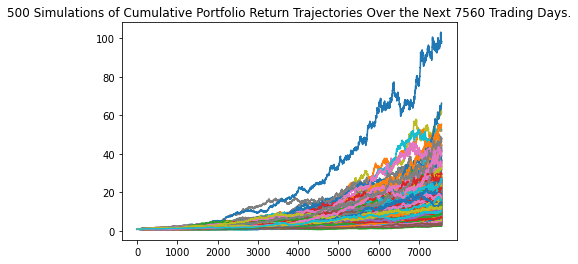

In [137]:
# Plot simulation outcomes
line_plot = monte_thirtyyear.plot_simulation()

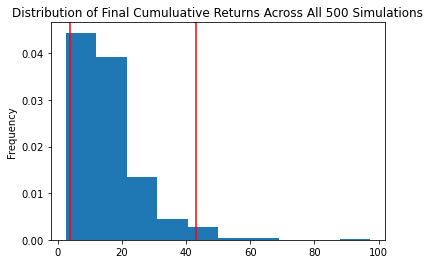

In [138]:
# Plot probability distribution and confidence intervals
dist_plot = monte_thirtyyear.plot_distribution()

### Retirement Analysis

In [139]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = monte_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             15.558870
std              10.571581
min               2.444832
25%               8.130387
50%              13.146868
75%              19.386681
max              97.371924
95% CI Lower      3.780348
95% CI Upper     43.103163
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [140]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
confidence_lower = round(summary_stats[8]*initial_investment,2)
confidence_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_lower} and ${confidence_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75606.96 and $862063.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [141]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confidence_lower = round(summary_stats[8]*initial_investment,2)
confidence_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_lower} and ${confidence_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113410.44 and $1293094.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [142]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [143]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005676,1.003955,1.015676,1.004086,0.997495,0.984936,0.986034,1.002667,0.996425,1.000501,...,0.991977,0.999450,1.004442,0.991332,1.008347,0.995753,0.995830,0.987162,0.993469,1.003200
2,1.007227,1.004514,1.012385,1.002184,0.999014,1.002066,0.985996,1.012625,0.998049,0.999613,...,0.984697,1.009407,1.003448,0.991257,1.006442,0.992719,0.989150,0.995798,0.984985,1.003517
3,1.011043,1.002736,1.009309,1.006493,1.001124,1.008873,1.001643,1.017643,0.991332,1.001791,...,0.979887,1.013693,1.000453,0.996001,1.013953,0.995545,0.986814,0.993182,0.984693,1.001078
4,1.018817,1.009619,1.009219,0.993071,1.011347,1.014249,1.005566,1.026841,0.986534,0.991745,...,0.981898,1.009928,1.006200,0.995877,1.009795,0.983682,0.994191,0.992036,0.978546,1.009939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.679542,1.821685,1.324602,1.823862,1.244105,1.763482,1.863356,1.400607,1.113159,2.111666,...,1.862572,1.848859,1.920570,1.484873,1.611773,1.287248,2.072375,1.442400,1.254104,1.541265
1257,1.678486,1.838482,1.313351,1.829007,1.251121,1.753793,1.860059,1.399073,1.113308,2.140771,...,1.848452,1.872650,1.907494,1.478924,1.600640,1.292065,2.061965,1.456850,1.257303,1.550946
1258,1.680466,1.838820,1.321788,1.825297,1.254315,1.781697,1.858995,1.406351,1.101569,2.130767,...,1.846005,1.869800,1.922937,1.467027,1.584275,1.296088,2.063216,1.436635,1.252852,1.528722
1259,1.691874,1.825420,1.315611,1.830697,1.268076,1.799653,1.849907,1.402555,1.101882,2.138824,...,1.846231,1.893242,1.929347,1.470811,1.596388,1.316675,2.050486,1.446899,1.272182,1.537105


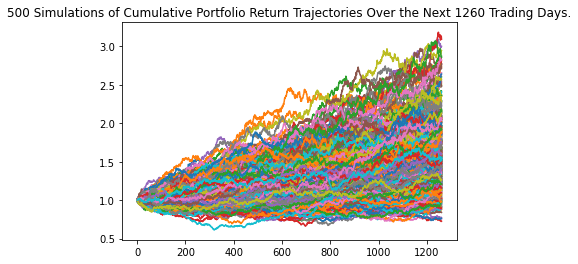

In [154]:
# Plot simulation outcomes 
line_plot = monte_fiveyear.plot_simulation()


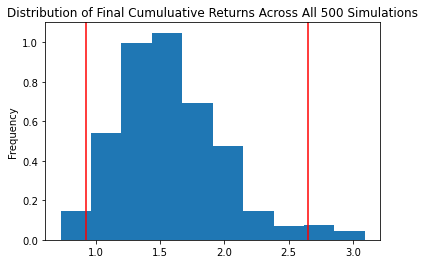

In [155]:
# Plot probability distribution and confidence intervals
dist_plot = monte_fiveyear.plot_distribution()


In [156]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = monte_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(summary_5)

count           500.000000
mean              1.583328
std               0.408948
min               0.726346
25%               1.305728
50%               1.528514
75%               1.819979
max               3.092004
95% CI Lower      0.924848
95% CI Upper      2.647267
Name: 1260, dtype: float64


In [157]:
# Set initial investment
initial_investment = 60000



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
confidence_lower_5 = round(summary_5[8]*initial_investment,2)
confidence_upper_5 = round(summary_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${confidence_lower_5} and ${confidence_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55490.87 and $158836.02


### Ten Years Retirement Option

In [158]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [159]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996987,0.997254,1.010117,1.006089,1.007631,0.990138,1.011921,0.984607,1.004944,0.999108,...,1.000397,0.994624,1.006014,0.996851,0.997374,1.002851,1.018113,0.989644,0.999249,1.016727
2,0.984660,1.005416,1.014983,1.009141,1.017843,0.979484,1.004309,0.979671,1.005519,0.993107,...,0.997631,0.987262,1.015577,0.994383,0.999406,1.000881,1.017397,0.978255,1.005663,1.023102
3,0.986936,1.011773,1.019066,1.002769,1.018433,0.989683,0.999273,0.980331,0.992400,0.985221,...,0.999569,0.989951,1.022237,0.987470,0.995944,0.998454,1.006523,0.979182,1.009371,1.018029
4,0.986057,1.005745,1.023682,1.001717,1.004714,0.987753,1.002100,0.987640,0.997769,0.984505,...,0.992572,1.000830,1.014630,0.994129,1.004586,1.007531,1.008334,0.981807,1.008962,1.013482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.217980,3.715784,2.305471,4.413854,4.763304,2.911719,1.427538,1.244570,1.752138,2.980447,...,1.809194,3.306191,1.858803,3.793528,2.056020,3.778932,3.602071,1.490214,2.363779,1.754891
2517,4.188185,3.755279,2.303992,4.414667,4.751669,2.879068,1.432106,1.261443,1.767168,3.024154,...,1.815617,3.330216,1.836370,3.869210,2.054478,3.856007,3.616574,1.473020,2.380258,1.759948
2518,4.196909,3.781392,2.313107,4.424825,4.739867,2.868363,1.452175,1.269419,1.757780,3.039210,...,1.823828,3.322636,1.830897,3.860536,2.056985,3.898269,3.589595,1.472798,2.409611,1.761625
2519,4.156966,3.720995,2.313545,4.427295,4.758876,2.873975,1.447789,1.264757,1.782657,3.041122,...,1.818052,3.363140,1.832695,3.871834,2.064211,3.947760,3.622342,1.464729,2.406864,1.753020


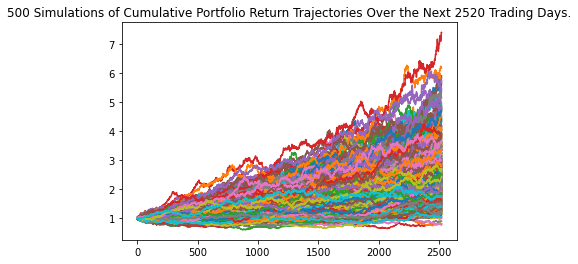

In [160]:
# Plot simulation outcomes
line_plot = monte_tenyear.plot_simulation()


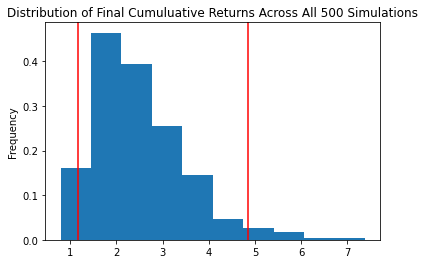

In [161]:
# Plot probability distribution and confidence intervals
dist_plot = monte_tenyear.plot_distribution()

In [162]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = monte_tenyear.summarize_cumulative_return()

# Print summary statistics
print(summary_10)

count           500.000000
mean              2.496033
std               0.982254
min               0.790543
25%               1.781730
50%               2.313670
75%               3.029691
max               7.379791
95% CI Lower      1.159896
95% CI Upper      4.843878
Name: 2520, dtype: float64


In [163]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
confidence_lower_10 = round(summary_10[8]*initial_investment,2)
confidence_upper_10 = round(summary_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${confidence_lower_10} and ${confidence_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69593.77 and $290632.66
